In [1]:
from rational.utils.examples.keras import prepare_data_keras, compile_keras_model
import numpy as np
import os

import matplotlib.pyplot as plt
from tensorflow.random import set_seed
plt.style.use('bmh')

In [2]:
seed = 4242
set_seed(seed)
np.random.seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

In [3]:
epochs = 42
train_generator, test_generator = prepare_data_keras(seed=seed, batch_size=256)

/home/ml-jzimmermann/notebooks/venv/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [4]:
model = compile_keras_model(rational=False)

history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, verbose=1)
relu_history = history.history

Epoch 1/42
235/235 [==============================] - 21s 90ms/step - loss: 2.2445 - accuracy: 0.2913 - val_loss: 1.6708 - val_accuracy: 0.4856
Epoch 2/42
235/235 [==============================] - 20s 86ms/step - loss: 0.7007 - accuracy: 0.7722 - val_loss: 0.2161 - val_accuracy: 0.9319
Epoch 3/42
235/235 [==============================] - 20s 83ms/step - loss: 0.2409 - accuracy: 0.9237 - val_loss: 0.2057 - val_accuracy: 0.9302
Epoch 4/42
235/235 [==============================] - 20s 86ms/step - loss: 0.1668 - accuracy: 0.9471 - val_loss: 0.0946 - val_accuracy: 0.9709
Epoch 5/42
235/235 [==============================] - 19s 82ms/step - loss: 0.1314 - accuracy: 0.9584 - val_loss: 0.0844 - val_accuracy: 0.9739
Epoch 6/42
235/235 [==============================] - 20s 87ms/step - loss: 0.1079 - accuracy: 0.9661 - val_loss: 0.0703 - val_accuracy: 0.9759
Epoch 7/42
235/235 [==============================] - 20s 84ms/step - loss: 0.0941 - accuracy: 0.9708 - val_loss: 0.0629 - val_accuracy:

In [5]:
model = compile_keras_model(rational=True)

history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, verbose=1)
rational_history = history.history

Epoch 1/42
235/235 [==============================] - 38s 161ms/step - loss: 2.2986 - accuracy: 0.1204 - val_loss: 2.2903 - val_accuracy: 0.1605
Epoch 2/42
235/235 [==============================] - 36s 154ms/step - loss: 1.4981 - accuracy: 0.5101 - val_loss: 0.2287 - val_accuracy: 0.9285
Epoch 3/42
235/235 [==============================] - 51s 217ms/step - loss: 0.1916 - accuracy: 0.9406 - val_loss: 0.1044 - val_accuracy: 0.9660
Epoch 4/42
235/235 [==============================] - 54s 228ms/step - loss: 0.1109 - accuracy: 0.9656 - val_loss: 0.0603 - val_accuracy: 0.9798
Epoch 5/42
235/235 [==============================] - 54s 230ms/step - loss: 0.0797 - accuracy: 0.9747 - val_loss: 0.0546 - val_accuracy: 0.9818
Epoch 6/42
235/235 [==============================] - 54s 232ms/step - loss: 0.0652 - accuracy: 0.9794 - val_loss: 0.0401 - val_accuracy: 0.9874
Epoch 7/42
235/235 [==============================] - 54s 232ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0341 - val_ac

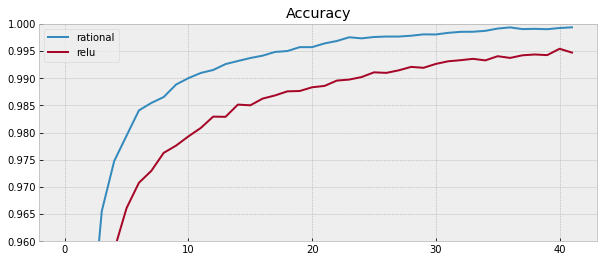

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['accuracy'], label='rational')
plt.plot(range(epochs), relu_history['accuracy'], label='relu')
plt.title('Accuracy')
plt.ylim((0.96, 1))
plt.legend()
plt.show()

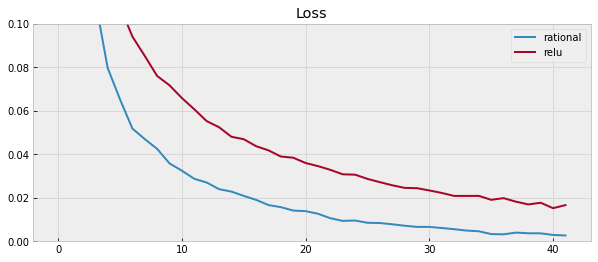

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['loss'], label='rational')
plt.plot(range(epochs), relu_history['loss'], label='relu')
plt.title('Loss')
plt.ylim((0, 0.1))
plt.legend()
plt.show()

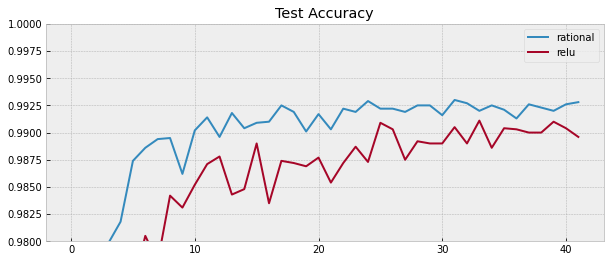

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['val_accuracy'], label='rational')
plt.plot(range(epochs), relu_history['val_accuracy'], label='relu')
plt.title('Test Accuracy')
plt.ylim((0.98, 1))
plt.legend()
plt.show()

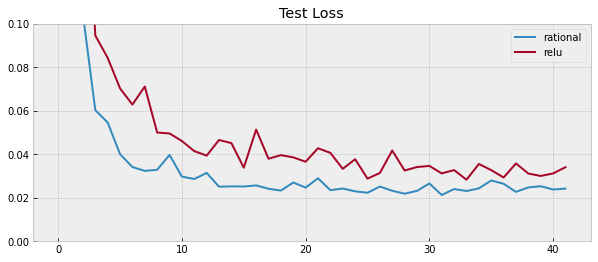

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(range(epochs), rational_history['val_loss'], label='rational')
plt.plot(range(epochs), relu_history['val_loss'], label='relu')
plt.title('Test Loss')
plt.ylim((0, 0.1))
plt.legend()
plt.show()